Dataset Preview:
         Date  Soil Moisture (%)  Rainfall (mm)
0  2025-01-01                 48       6.351022
1  2025-01-02                 38       5.923223
2  2025-01-03                 24       4.402323
3  2025-01-04                 52       0.211197
4  2025-01-05                 17       2.982636

Statistical Summary:
       Soil Moisture (%)  Rainfall (mm)
count         100.000000     100.000000
mean           34.070000       7.260067
std            14.447575       4.061757
min            10.000000       0.007806
25%            23.000000       3.832951
50%            33.000000       6.951264
75%            48.000000      10.424516
max            59.000000      14.966107

Irrigation Recommendations:
    Soil Moisture (%) Irrigation Recommendation
0                  48      No Irrigation Needed
1                  38      No Irrigation Needed
2                  24       Irrigation Required
3                  52      No Irrigation Needed
4                  17       Irrigation Requi

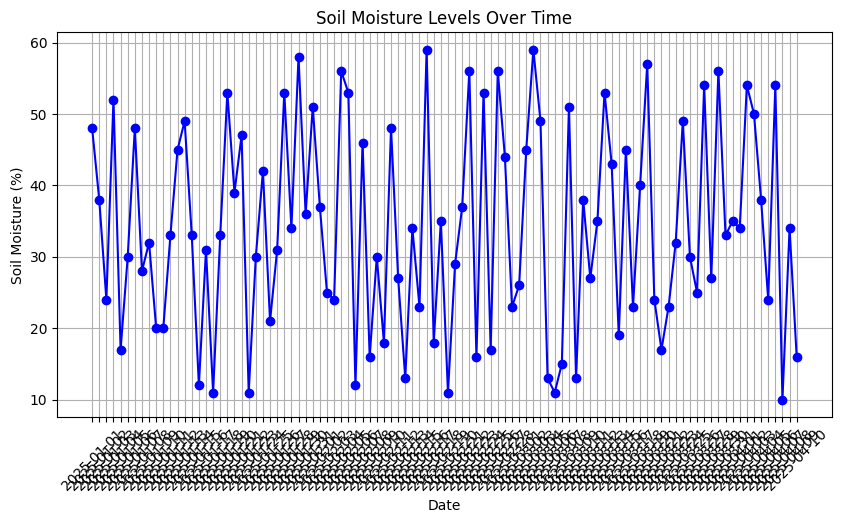

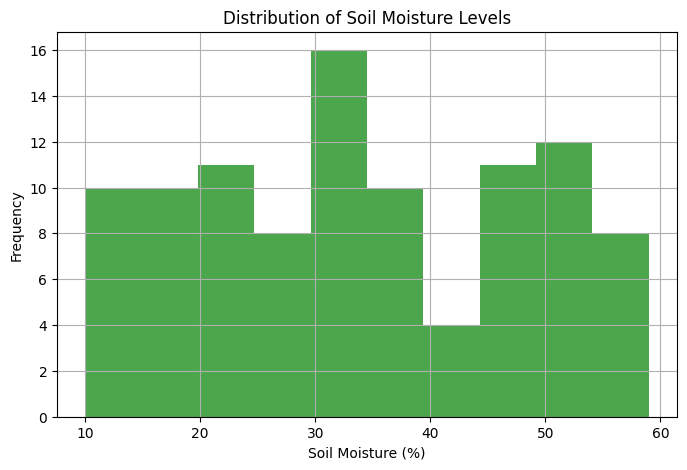

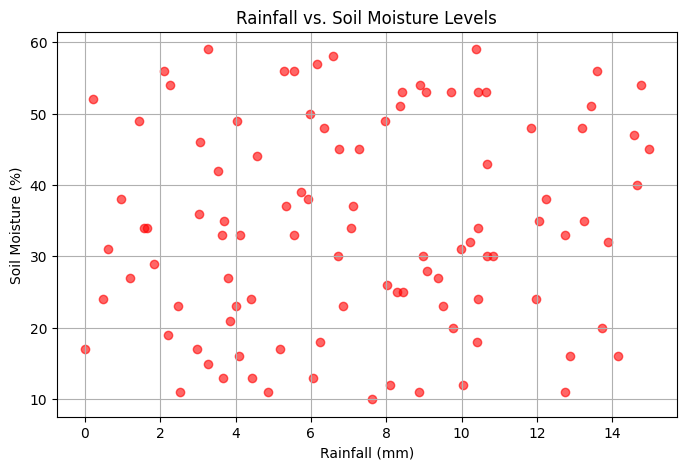

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset (replace 'soil_moisture_data.csv' with the actual file path)
data = pd.read_csv("soil_moisture_data.csv")

# Display the first few rows of the dataset
print("Dataset Preview:")
print(data.head())

# Statistical summary of the data
print("\nStatistical Summary:")
print(data.describe())

# Define thresholds for irrigation decision-making
moisture_threshold = 30  # Example: Below 30% soil moisture requires irrigation

# Generate irrigation recommendations
conditions = [
    (data['Soil Moisture (%)'] < moisture_threshold),
    (data['Soil Moisture (%)'] >= moisture_threshold)
]
recommendations = ['Irrigation Required', 'No Irrigation Needed']
data['Irrigation Recommendation'] = np.select(conditions, recommendations, default="Unknown")

# Display irrigation recommendations
print("\nIrrigation Recommendations:")
print(data[['Soil Moisture (%)', 'Irrigation Recommendation']])

# Analyze historical weather trends
if 'Rainfall (mm)' in data.columns:
    avg_rainfall = data['Rainfall (mm)'].mean()
    print(f"\nAverage Rainfall Over Period: {avg_rainfall:.2f} mm")
    if avg_rainfall > 5:
        print("Frequent rainfall detected; irrigation needs may be lower.")
    else:
        print("Low rainfall detected; irrigation may be necessary.")

# Visualization: Soil Moisture Over Time
if 'Date' in data.columns:
    plt.figure(figsize=(10, 5))
    plt.plot(data["Date"], data["Soil Moisture (%)"], marker="o", linestyle="-", color="blue")
    plt.xlabel("Date")
    plt.ylabel("Soil Moisture (%)")
    plt.title("Soil Moisture Levels Over Time")
    plt.xticks(rotation=45)
    plt.grid()
    plt.show()

# Visualization: Histogram of Soil Moisture Levels
plt.figure(figsize=(8, 5))
plt.hist(data["Soil Moisture (%)"], bins=10, color="green", alpha=0.7)
plt.xlabel("Soil Moisture (%)")
plt.ylabel("Frequency")
plt.title("Distribution of Soil Moisture Levels")
plt.grid()
plt.show()

# Visualization: Scatter Plot of Rainfall vs. Soil Moisture
if 'Rainfall (mm)' in data.columns:
    plt.figure(figsize=(8, 5))
    plt.scatter(data["Rainfall (mm)"], data["Soil Moisture (%)"], color="red", alpha=0.6)
    plt.xlabel("Rainfall (mm)")
    plt.ylabel("Soil Moisture (%)")
    plt.title("Rainfall vs. Soil Moisture Levels")
    plt.grid()
    plt.show()
